In [ ]:
!git clone https://github.com/GianinaCosmina/Teeth-Problems-Detection.git

Cloning into 'Teeth-Problems-Detection'...
remote: Enumerating objects: 289, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (246/246), done.
remote: Total 289 (delta 19), reused 252 (delta 10), pack-reused 26
Receiving objects: 100% (289/289), 95.98 MiB | 17.33 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append("/content/Teeth-Problems-Detection")

In [ ]:
%cd /content/Teeth-Problems-Detection

/content/Teeth-Problems-Detection


In [ ]:
# from download_dataset import *
# import os
# path = "/content/Data"
# if os.path.exists(path+'/DentalPanoramicXrays.zip') == False:
#   os.mkdir(path)
#   download_dataset(path+'/')

In [ ]:
from images_prepare import *
#pre_images(resize_shape,path,include_zip)
path="/content/Teeth-Problems-Detection/Data"
X,X_sizes=pre_images((512,512),path,True)

In [ ]:
from masks_prepare import *
Y=pre_masks(resize_shape=(512,512),path='/content/Teeth-Problems-Detection/Original_Masks')  # ORIGINALL MASKS function 
# Y=pre_splitted_masks(path='/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image-Using-U-Net/Custom_Masks') #Custom Splitted MASKS size 512x512


In [ ]:
X=np.float32(X/255)
Y=np.float32(Y/255)

In [ ]:
x_train=X[:80,:,:,:]
y_train=Y[:80,:,:,:]
x_test=X[80:,:,:,:]
y_test=Y[80:,:,:,:]

In [ ]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

In [ ]:
!pip uninstall opencv-python-headless==4.5.5.62

In [ ]:
!pip install opencv-python-headless==4.5.2.52

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 39.1 MB/s eta 0:00:00


In [ ]:
import cv2

import albumentations as A
# Augmention

aug = A.Compose([
    A.OneOf([A.RandomCrop(width=512, height=512),
                 A.PadIfNeeded(min_height=512, min_width=512, p=0.5)],p=0.4),
    A.RandomBrightnessContrast(brightness_limit=0.25, contrast_limit=0.25,p=0.5),
    A.Compose([A.RandomScale(scale_limit=(-0.15, 0.15), p=1, interpolation=1),
                            A.PadIfNeeded(512, 512, border_mode=cv2.BORDER_CONSTANT), 
                            A.Resize(512, 512, cv2.INTER_NEAREST), ],p=0.5),
    A.ShiftScaleRotate (shift_limit=0.325, scale_limit=0.15, rotate_limit=15,border_mode=cv2.BORDER_CONSTANT, p=1),
    A.Rotate(15,p=0.5),
    A.Blur(blur_limit=1, p=0.5),
    A.Downscale(scale_min=0.15, scale_max=0.25,  always_apply=False, p=0.5),
    A.GaussNoise(var_limit=(0.05, 0.1), mean=0, per_channel=True, always_apply=False, p=0.5),
    A.HorizontalFlip(p=0.25),
])

x_train1=np.copy(x_train)
y_train1=np.copy(y_train)
count=0
while(count<4):
  x_aug2=np.copy(x_train1)
  y_aug2=np.copy(y_train1)
  for i in range(len(x_train1)):
    augmented=aug(image=x_train1[i,:,:,:],mask=y_train1[i,:,:,:])
    x_aug2[i,:,:,:]= augmented['image']
    y_aug2[i,:,:,:]= augmented['mask']
  x_train=np.concatenate((x_train,x_aug2))
  y_train=np.concatenate((y_train,y_aug2))
  if count == 9:
    break
  count += 1

/usr/local/lib/python3.8/dist-packages/albumentations/augmentations/transforms.py:1580: UserWarning: Using default interpolation INTER_NEAREST, which is sub-optimal.Please specify interpolation mode for downscale and upscale explicitly.For additional information see this PR https://github.com/albumentations-team/albumentations/pull/584
  warnings.warn(


In [ ]:
#For Relase unneccasery memory
del x_aug2
del X
del Y
del y_aug2
del y_train1
del x_train1
del augmented

In [ ]:
import random
import matplotlib.pyplot as plt
random_number=random.randint(0,80)
print(random_number)

49


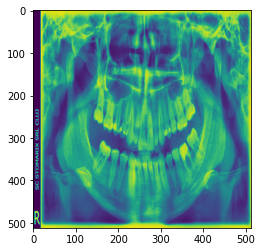

In [ ]:
#Checking data X and Y matching
plt.imshow(x_train[random_number,:,:,0])

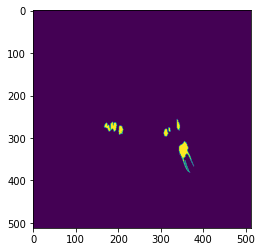

In [ ]:
#Checking data X and Y matching
plt.imshow(y_train[random_number,:,:,0])

In [ ]:
from model import *
model=UNET(input_shape=(512,512,1),last_activation='sigmoid')
model.summary()

In [ ]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(x_train,y_train,batch_size=10,epochs=200,verbose=1)

Epoch 1/200
40/40 [==============================] - 68s 1s/step - loss: 0.0303 - accuracy: 0.9697
Epoch 2/200
40/40 [==============================] - 53s 1s/step - loss: 0.0018 - accuracy: 0.9840
Epoch 3/200
40/40 [==============================] - 53s 1s/step - loss: 0.0012 - accuracy: 0.9840
Epoch 4/200
40/40 [==============================] - 53s 1s/step - loss: 9.2160e-04 - accuracy: 0.9840
Epoch 5/200
40/40 [==============================] - 53s 1s/step - loss: 7.9877e-04 - accuracy: 0.9840
Epoch 6/200
40/40 [==============================] - 53s 1s/step - loss: 7.4271e-04 - accuracy: 0.9840
Epoch 7/200
40/40 [==============================] - 53s 1s/step - loss: 7.2433e-04 - accuracy: 0.9840
Epoch 8/200
40/40 [==============================] - 53s 1s/step - loss: 6.8523e-04 - accuracy: 0.9840
Epoch 9/200
40/40 [==============================] - 53s 1s/step - loss: 6.6527e-04 - accuracy: 0.9840
Epoch 10/200
40/40 [==============================] - 53s 1s/step - loss: 6.4736e-04 

In [ ]:
predict_img=model.predict(x_test)
##model.save(path)
predict=predict_img[0,:,:,0]

1/1 [==============================] - 0s 284ms/step


In [ ]:
#Example Test
from sklearn.metrics import f1_score
import numpy as np
predict_img1=(predict_img>0.25)*1
y_test1=(y_test>0.25)*1

f1_score(predict_img1.flatten(), y_test1.flatten(), average='micro')

1.0

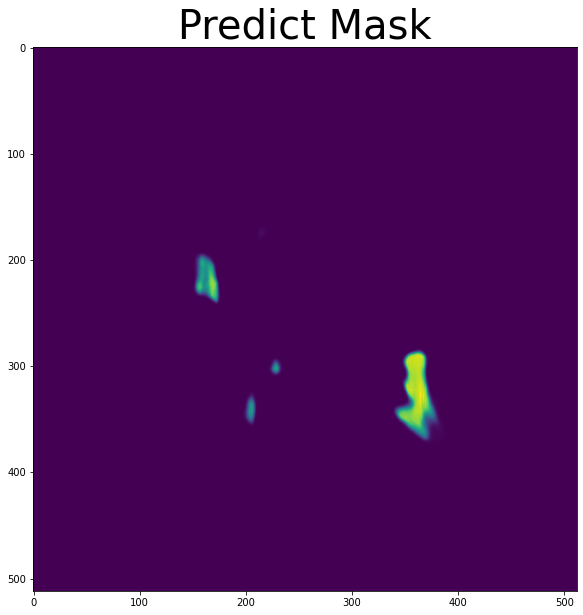

In [ ]:
plt.figure(figsize = (20,10))
plt.title("Predict Mask",fontsize = 40)
plt.imshow(predict)
#For CCA, we saved
plt.imsave("/content/predict.png",predict)

1/1 [==============================] - 0s 21ms/step


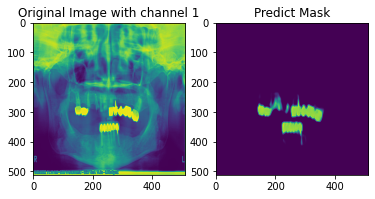

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from CCA_Analysis import *


##Plotting - RESULT Example
img=Image.open("/content/Teeth-Problems-Detection/Data/Images/91.jpg")

###################################################

# predictie
img2 = img.resize((512,512), Image.ANTIALIAS)
img2 = convert_one_channel(np.asarray(img2))
# img2 = np.expand_dims(img2, axis=0)
img2 = np.reshape(img2,(1,512,512,1))
img2 = np.float32(img2/255)

predict_img=model.predict(img2)
predict=predict_img[0,:,:,0]

###################################################

# Plotting
plt.axis('off')

plt.subplot(1,2,1)
# plt.figure(figsize = (20,10))
plt.title("Original Image with channel 1")
plt.imshow(img2[0,:,:,0])

plt.subplot(1,2,2)
# plt.figure(figsize = (20,10))
plt.title("Predict Mask")
plt.imshow(predict)
plt.imsave("/content/predict.png",predict)

plt.show()

#############################

# predict1 = cv2.resize(predict, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

# mask=np.uint8(predict1*510)# 
# _, mask = cv2.threshold(mask, thresh=255/2, maxval=255, type=cv2.THRESH_BINARY)
# cnts,hieararch=cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# img = cv2.drawContours(cv2.UMat(img[:,:,0]), cnts, -1, (255, 0, 0) , 2)
# img = cv2.UMat.get(img)
# # cv2_imshow(img)

In [ ]:
####################### Conectare La Anvil ################################

In [ ]:
!pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=4b3d07cab502ab8a47bf04c2924c10cb77e2d3f081a04156b19ee33be9f34930
  Stored in directory: /root/.cache/pip/wheels/ea/f9/a1/34e2943cce3cf7daca304bfc35e91280694ced9194a487ce2f
Successfully built ws4py


In [ ]:
import anvil.server

anvil.server.connect("X4D6NLG34YNOA6TM7Q2J4EWN-T3IPCXFQWW4PSGYC")

In [ ]:
import anvil.media
import base64
import io
from PIL import Image
import tensorflow
from tensorflow.keras.utils import load_img


@anvil.server.callable
def detect_problems(file):
  img = Image.open(io.BytesIO(file.get_bytes()))
  img.save("/content/uploaded.png")
  img=cv2.imread("/content/uploaded.png")

  #########################################
  # predictie
  img2 = Image.open("/content/uploaded.png")
  img2 = img2.resize((512,512), Image.ANTIALIAS)
  img2 = convert_one_channel(np.asarray(img2))
  # img2 = np.expand_dims(img2, axis=0)
  img2 = np.reshape(img2,(1,512,512,1))
  img2 = np.float32(img2/255)

  predict_img=model.predict(img2)
  predict=predict_img[0,:,:,0]
  plt.imsave("/content/predict.png",predict)
  #########################################

  predicted=cv2.imread("/content/predict.png")
  predicted = cv2.resize(predicted, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

  cca_result,teeth_count=CCA_Analysis(img,predicted,3,2)
  plt.imsave("/content/detected.png",cca_result)

  with open("/content/detected.png", "rb") as image_file:
     encoded_string = base64.b64encode(image_file.read())
  image_binary = base64.b64decode(encoded_string)
  my_media = anvil.BlobMedia(content_type="img/png", content=image_binary, name="detected")

  return my_media

In [ ]:
########################## Compare Results #############################3

In [ ]:
ignoreVector = [84,  1, 68]

def dice_coef(img, img2):
        if img.shape != img2.shape:
            raise ValueError("Shape mismatch: img and img2 must have to be of the same shape.")
        else:
            
            lenIntersection=0
            lenimgToCount = 0
            
            for i in range(img.shape[0]):
                for j in range(img.shape[1]):
                    if not ( np.array_equal(img[i][j],ignoreVector)  and np.array_equal(img2[i][j],ignoreVector)):
                        if ( np.array_equal(img[i][j],img2[i][j]) ):
                            lenIntersection+=1
                        lenimgToCount = lenimgToCount + 1
             
            # lenimg=img.shape[0]*img.shape[1]
            # lenimg2=img2.shape[0]*img2.shape[1]
            lenimg = lenimgToCount
            lenimg2 = lenimgToCount
            value = (2. * lenIntersection  / (lenimg + lenimg2))
        return value

1/1 [==============================] - 0s 17ms/step


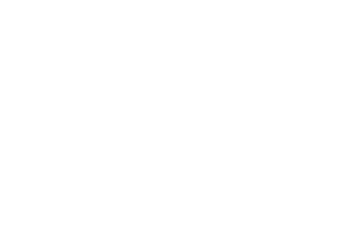

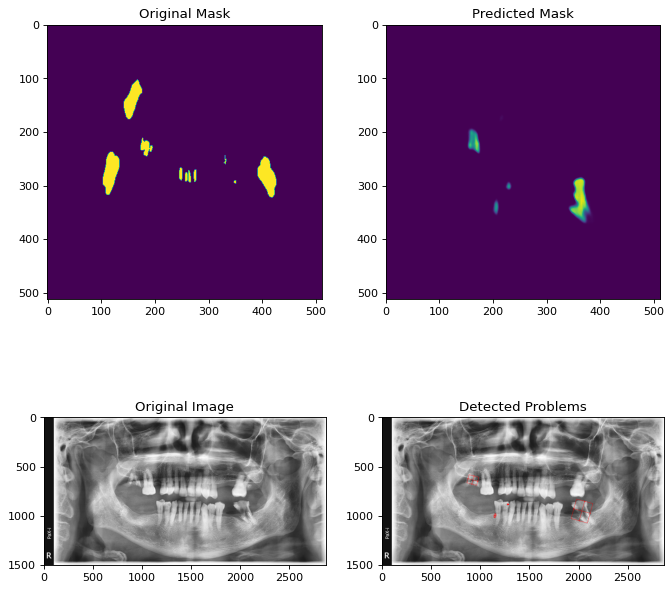



 DICE COEFFICIENT: 0.0


1/1 [==============================] - 0s 17ms/step


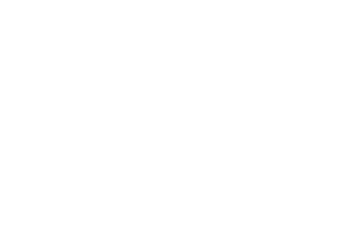

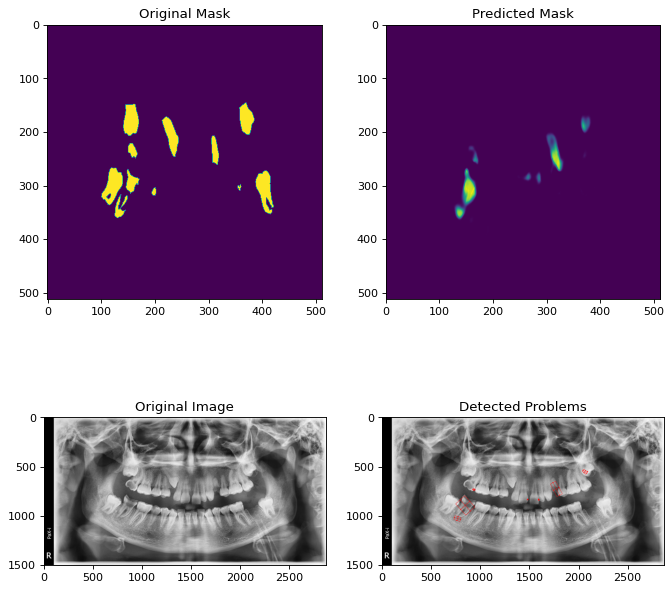



 DICE COEFFICIENT: 8.04634695848085e-05


1/1 [==============================] - 0s 18ms/step


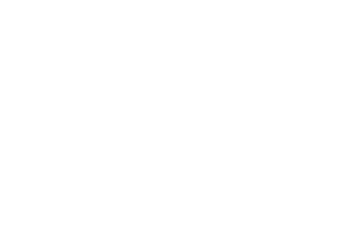

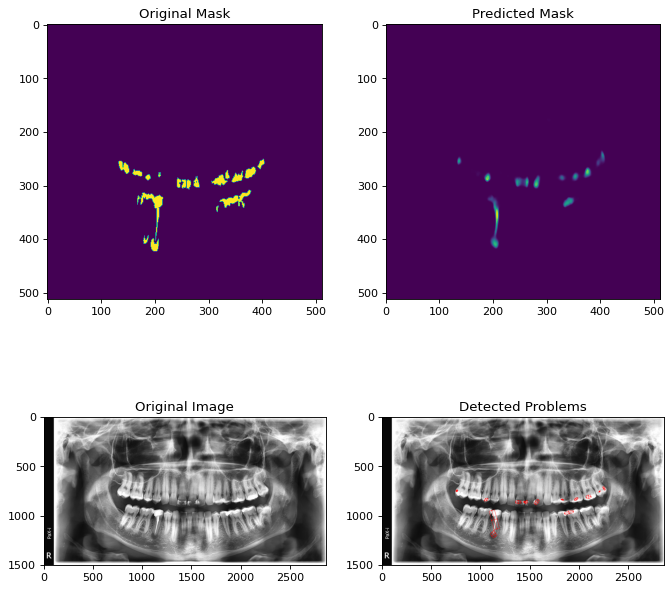



 DICE COEFFICIENT: 0.0003274394237066143


1/1 [==============================] - 0s 23ms/step


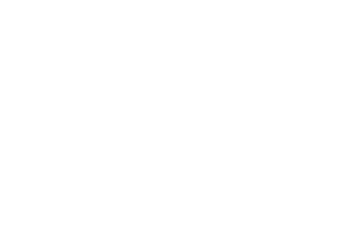

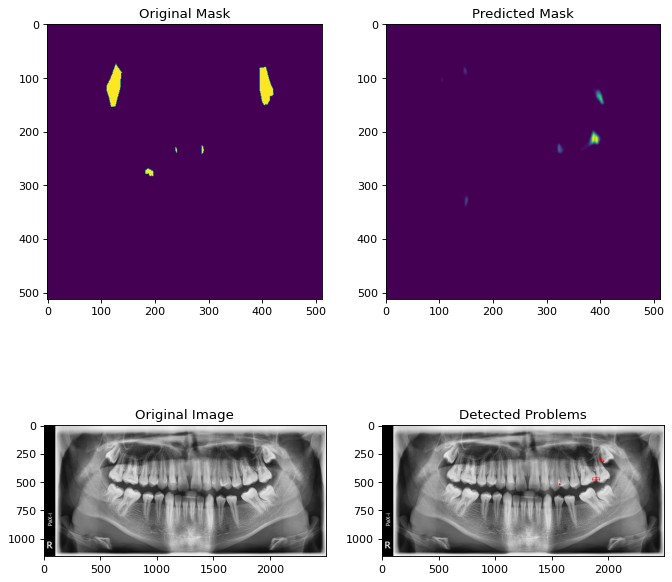



 DICE COEFFICIENT: 0.0


1/1 [==============================] - 0s 17ms/step


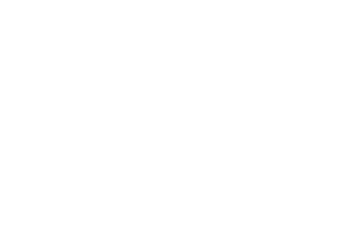

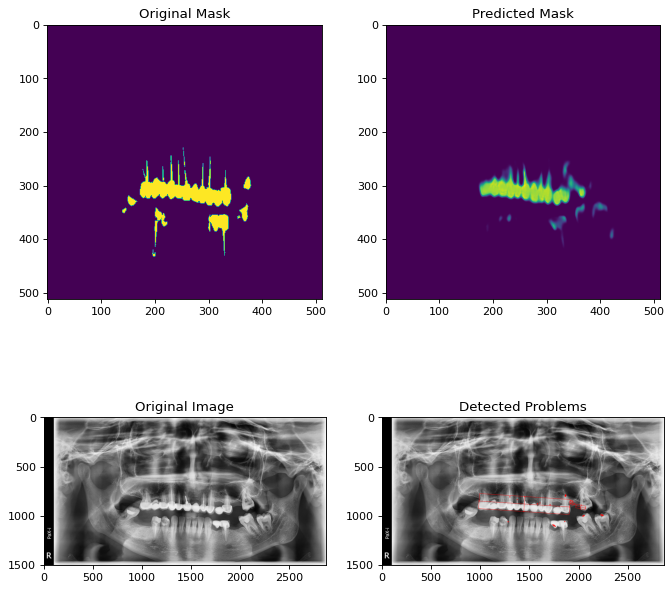



 DICE COEFFICIENT: 6.83667190811513e-05


1/1 [==============================] - 0s 17ms/step


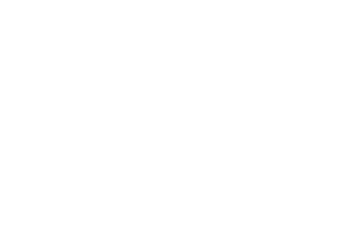

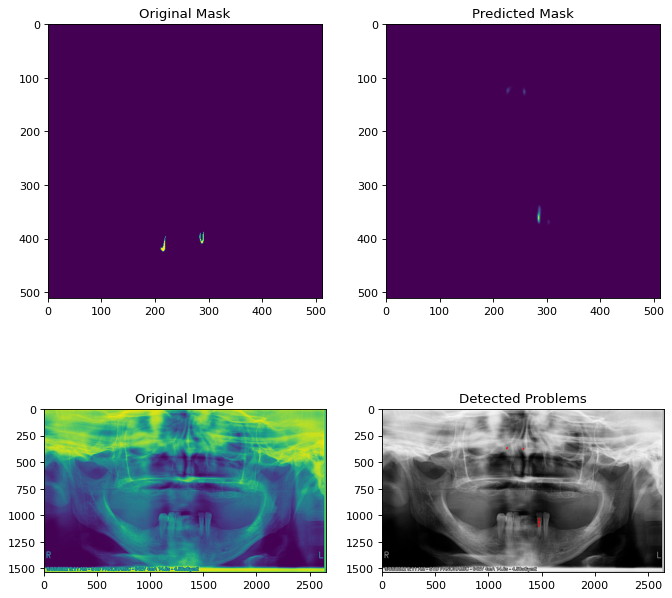



 DICE COEFFICIENT: 0.0


1/1 [==============================] - 0s 17ms/step


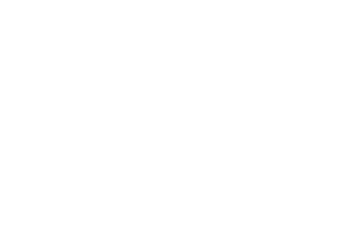

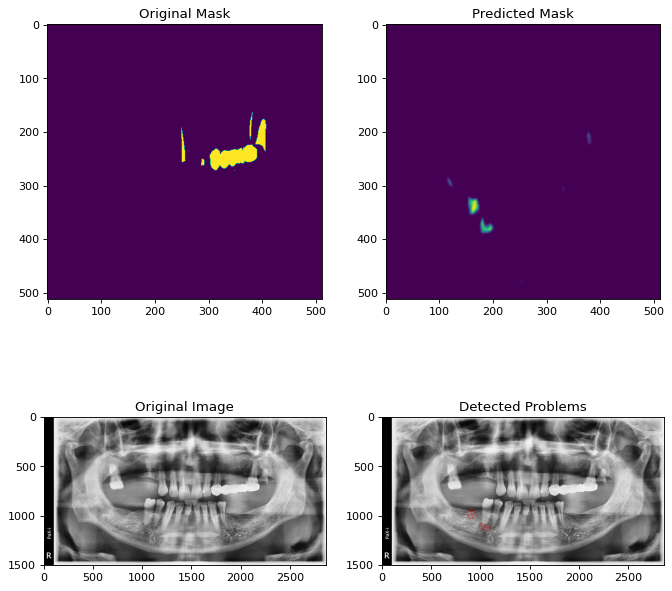



 DICE COEFFICIENT: 0.0


1/1 [==============================] - 0s 18ms/step


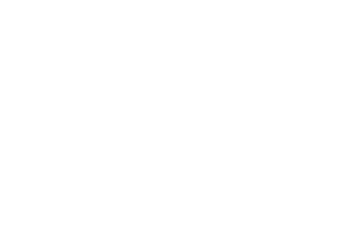

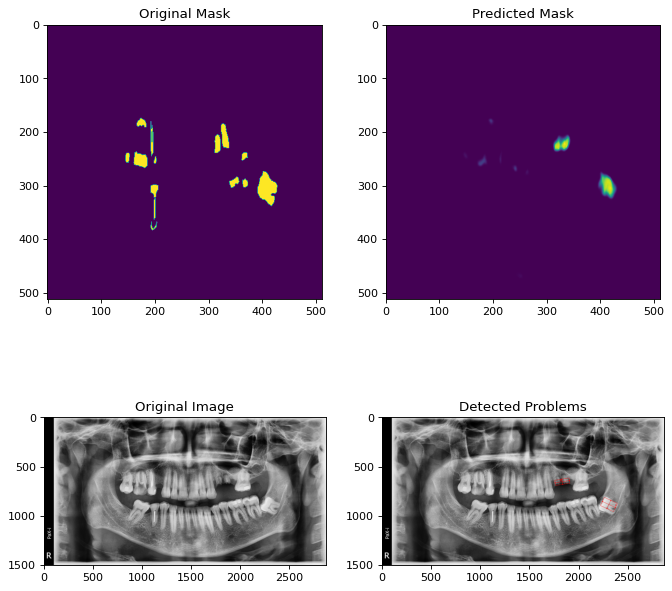



 DICE COEFFICIENT: 0.00017214666896195557


1/1 [==============================] - 0s 18ms/step


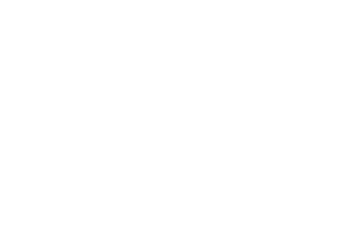

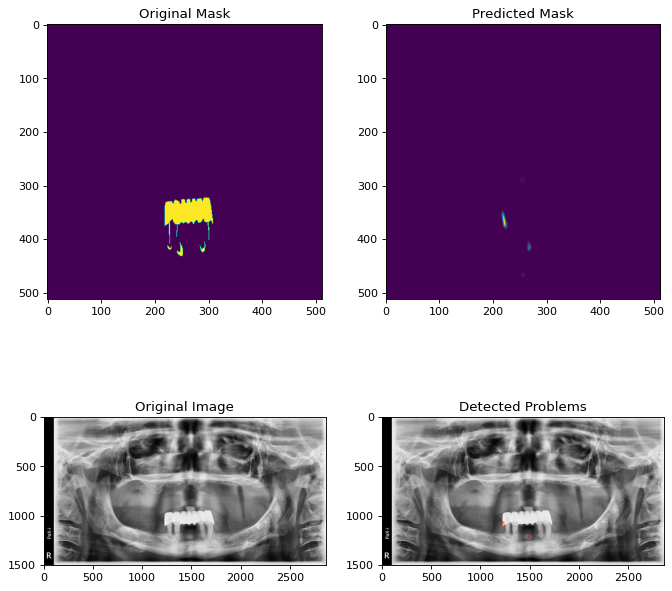



 DICE COEFFICIENT: 0.00020263424518743666


1/1 [==============================] - 0s 25ms/step


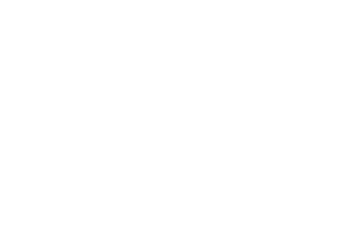

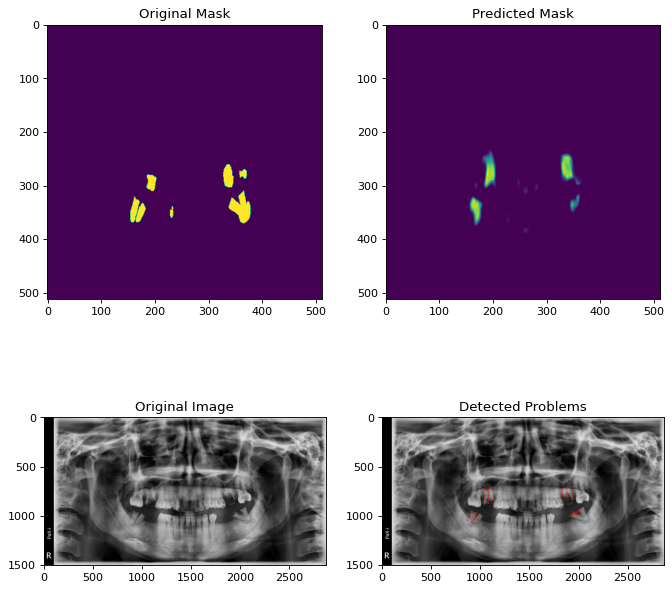



 DICE COEFFICIENT: 0.0


1/1 [==============================] - 0s 17ms/step


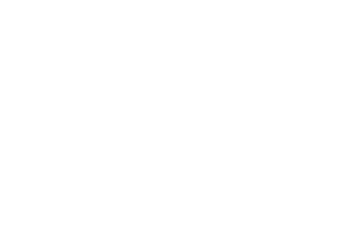

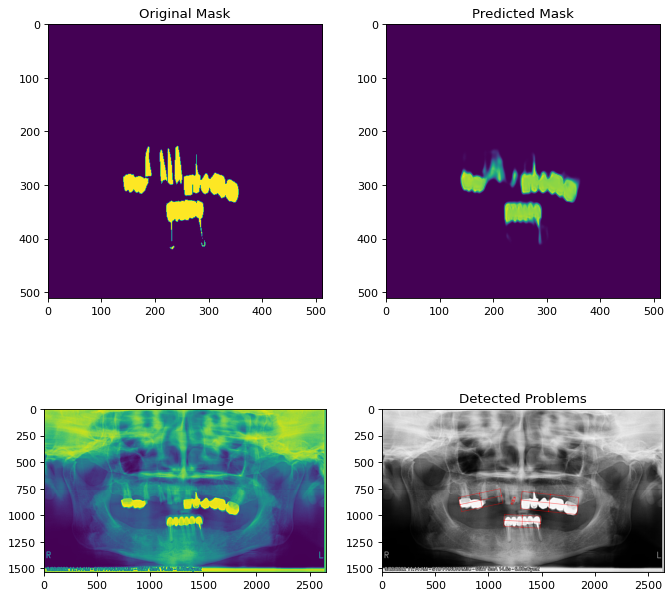



 DICE COEFFICIENT: 6.450780544445878e-05


1/1 [==============================] - 0s 18ms/step


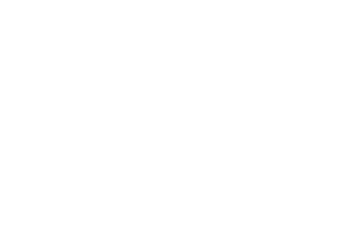

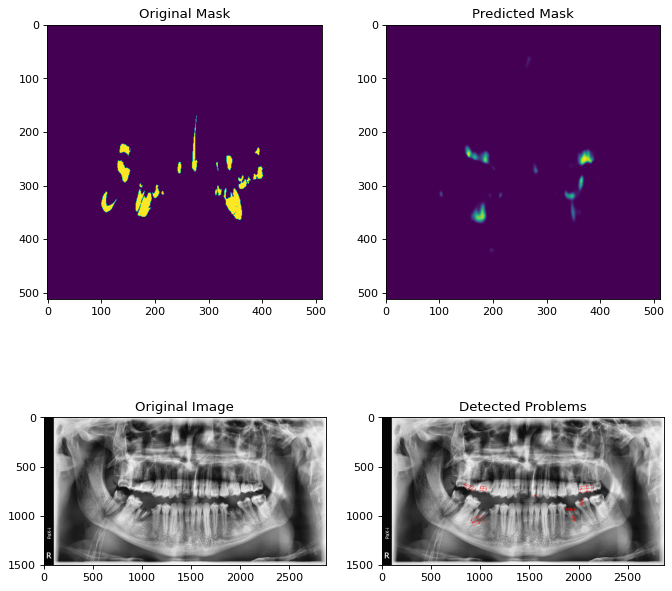



 DICE COEFFICIENT: 0.0


1/1 [==============================] - 0s 18ms/step


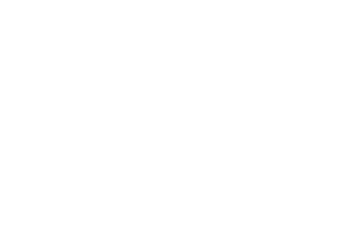

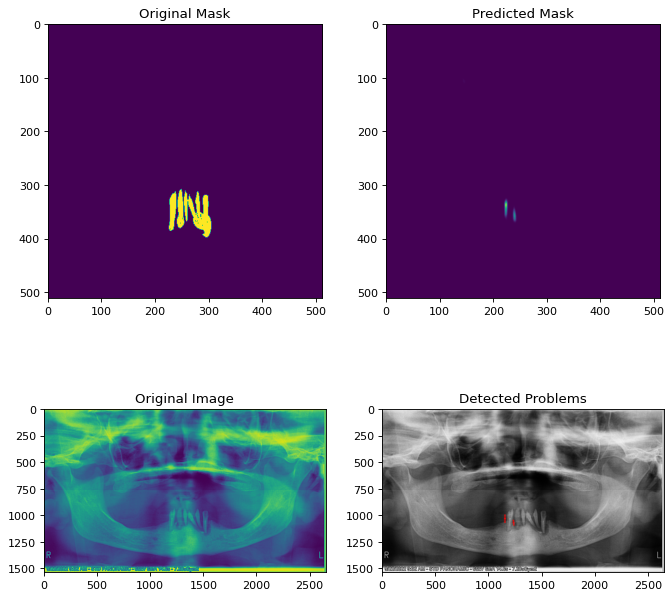



 DICE COEFFICIENT: 0.0


1/1 [==============================] - 0s 18ms/step


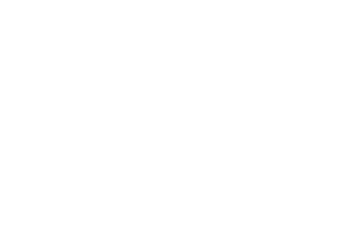

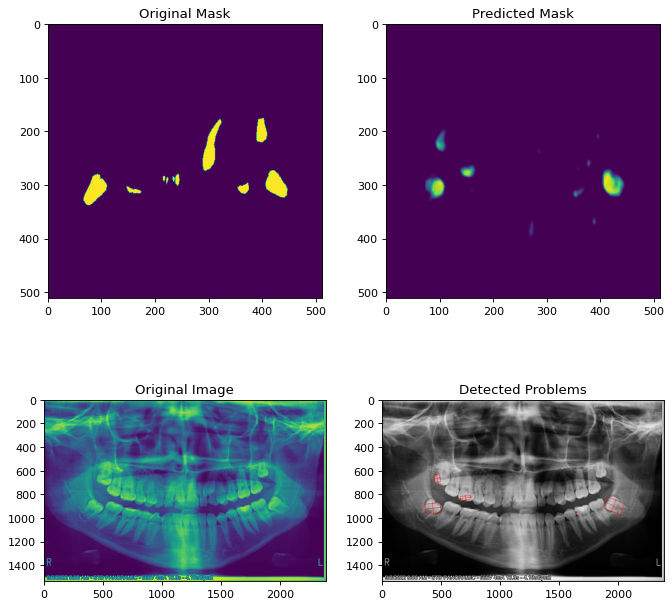



 DICE COEFFICIENT: 0.00021591277124041888


1/1 [==============================] - 0s 17ms/step


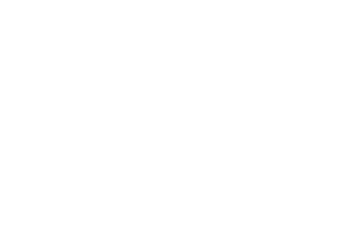

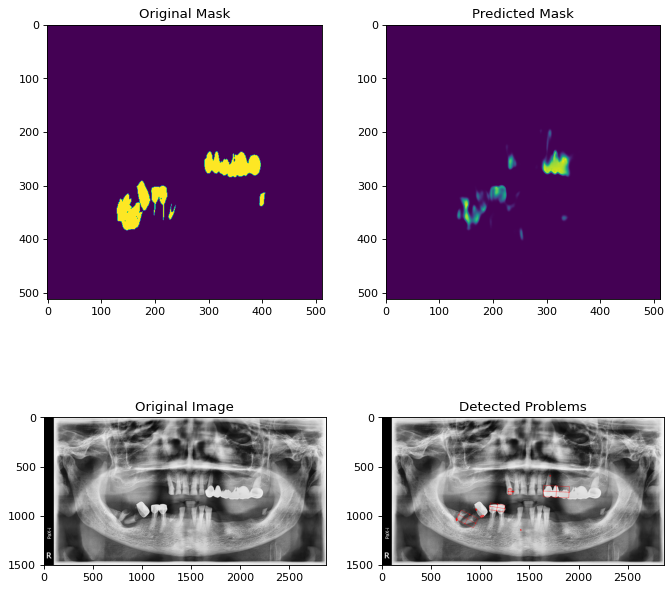

In [ ]:
##Plotting - RESULT Example
with open('/content/CompareResults/DiceCoefficients.txt', 'w') as writefile:
    writefile.write("")

for i in range(20):
  fileNo = i + 81
  img=Image.open("/content/Teeth-Problems-Detection/Data/Images/" + str(fileNo) + ".jpg")

  ###################################################

  # predictie
  img2 = img.resize((512,512), Image.ANTIALIAS)
  img2 = convert_one_channel(np.asarray(img2))
  # img2 = np.expand_dims(img2, axis=0)
  img2 = np.reshape(img2,(1,512,512,1))
  img2 = np.float32(img2/255)

  predict_img=model.predict(img2)
  predict=predict_img[0,:,:,0]

  plt.imsave("/content/predict.png",predict)
  #########################################

  img3=cv2.imread("/content/Teeth-Problems-Detection/Data/Images/" + str(fileNo) + ".jpg")
  predicted=cv2.imread("/content/predict.png")
  predicted = cv2.resize(predicted, (img3.shape[1],img3.shape[0]), interpolation=cv2.INTER_LANCZOS4)

  cca_result,teeth_count=CCA_Analysis(img3,predicted,3,2)
  plt.imsave("/content/detected.png",cca_result)

  plt.imsave("/content/originalMask.png",y_test[i,:,:,0])
  plt.imsave("/content/predictedMask.png",predict)

  ###################################################
  # Plotting
  plt.axis('off')
  # plt.tight_layout(pad=5.0)
  plt.figure(figsize=(10, 10), dpi=80)

  plt.subplot(2,2,1)
  plt.title("Original Mask")
  plt.imshow(y_test[i,:,:,0])
  #y_test[i,:,:,0].save("/content/CompareResults/OriginalMask_" + str(i + 1) + ".jpg")
  plt.imsave("/content/CompareResults/OriginalMask_" + str(i + 1) + ".png", y_test[i,:,:,0])

  plt.subplot(2,2,2)
  plt.title("Predicted Mask")
  plt.imshow(predict)
  # predict.save("/content/CompareResults/PredictedMask_" + str(i + 1) + ".jpg")
  plt.imsave("/content/CompareResults/PredictedMask_" + str(i + 1) + ".png", predict)

  plt.subplot(2,2,3)
  plt.title("Original Image")
  plt.imshow(img)
  img.save("/content/CompareResults/OriginalImage_" + str(i + 1) + ".jpg")
  #plt.imsave("/content/CompareResults/OriginalImage_" + str(i + 1) + ".png", img)

  plt.subplot(2,2,4)
  plt.title("Detected Problems")
  plt.imshow(cca_result)
  # cca_result.save("/content/CompareResults/DetectedProblems_" + str(i + 1) + ".jpg")
  plt.imsave("/content/CompareResults/DetectedProblems_" + str(i + 1) + ".png", cca_result)

  plt.show()

  ###########################

  originalMask=cv2.imread("/content/originalMask.png")
  predictedMask=cv2.imread("/content/predictedMask.png")

  dice = dice_coef(originalMask, predictedMask)
  print("\n\n DICE COEFFICIENT: " + str(dice) + "\n\n")
  with open('/content/CompareResults/DiceCoefficients.txt', 'a') as writefile:
    writefile.write("DICE COEFFICIENT " + str(i + 1) + ": " + str(dice) + "\n")

  #############################

In [ ]:
!zip -r /content/CompareResults.zip /content/CompareResults

from google.colab import files
files.download("/content/CompareResults.zip")

updating: content/CompareResults/ (stored 0%)
updating: content/CompareResults/OriginalMask_11.png (deflated 42%)
updating: content/CompareResults/OriginalMask_13.png (deflated 60%)
updating: content/CompareResults/DetectedProblems_7.png (deflated 1%)
updating: content/CompareResults/DetectedProblems_9.png (deflated 1%)
updating: content/CompareResults/OriginalMask_9.png (deflated 62%)
updating: content/CompareResults/DetectedProblems_15.png (deflated 1%)
updating: content/CompareResults/DiceCoefficients.txt (deflated 69%)
updating: content/CompareResults/OriginalImage_8.jpg (deflated 1%)
updating: content/CompareResults/OriginalImage_14.jpg (deflated 6%)
updating: content/CompareResults/OriginalMask_14.png (deflated 47%)
updating: content/CompareResults/DetectedProblems_17.png (deflated 1%)
updating: content/CompareResults/OriginalMask_12.png (deflated 39%)
updating: content/CompareResults/DetectedProblems_16.png (deflated 1%)
updating: content/CompareResults/OriginalMask_18.png (defl

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>